In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from sklearn.feature_extraction.text import CountVectorizer             
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import joblib

In [2]:
x , y = [],[]
##x = empty list to store msg 
##y = empty list to store label
with open("SMSSpamCollection.txt","r") as file:   ##reading the file 
    data = file.read()
    for data_item in data.split("\n"):   #iterating through each line in the file 
        if len(data_item.split("\t")) == 2:
            #addd the second elemnt msg to the x list 
            x.append(data_item.split("\t")[1])
            #add the first element label to the y list
            y.append(data_item.split("\t")[0])
print(len(x),len(y))

5574 5574


In [3]:
#preparing the data 
data_dict = {"msg":x,"label":y}
df = pd.DataFrame(data_dict)
df.head()

,msg,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [4]:
for i in range(0,len(df)):
    message = re.sub('[^a-zA-Z]',' ',df['msg'][i])
    ##this is a regular expression that matches any 
    # character that is not a letter and replaces it with a space
    message = message.lower()
    df["msg"][i] = message
    #this line updates the cleaned msgs in the msg column 
    
df.head(10)

C:\Users\jaikr\AppData\Local\Temp\ipykernel_9992\3296211613.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["msg"][i] = message


,msg,label
0,go until jurong point crazy available only ...,ham
1,ok lar joking wif u oni,ham
2,free entry in a wkly comp to win fa cup fina...,spam
3,u dun say so early hor u c already then say,ham
4,nah i don t think he goes to usf he lives aro...,ham
5,freemsg hey there darling it s been week s n...,spam
6,even my brother is not like to speak with me ...,ham
7,as per your request melle melle oru minnamin...,ham
8,winner as a valued network customer you have...,spam
9,had your mobile months or more u r entitle...,spam


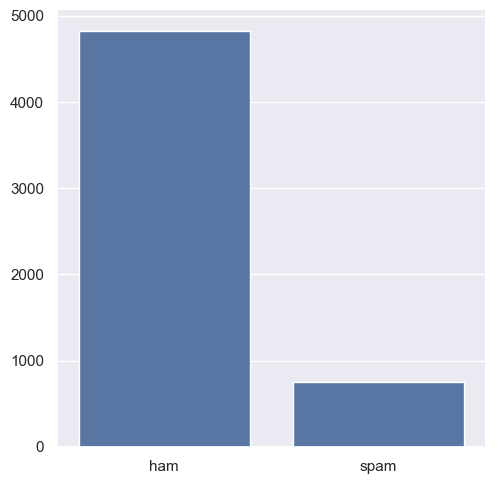

In [ ]:
##to check the data imbalance between spam and ham labels 
classs = list(df["label"].value_counts().index)
valu = list(df["label"].value_counts().values)
sns.set(rc={"figure.figsize":(20,10)})
sns.catplot(x=classs,y=valu,kind="bar")
plt.show()

In [8]:
df.sample(2000)

,msg,label
5184,i sent them do you like,ham
1222,prakesh is there know,ham
2359,i ll talk to the others and probably just come...,ham
2297,forwarded from hi this is your mai...,spam
1847,its on in engalnd but telly has decided it wo...,ham
...,...,...
1500,sms ac jsco energy is high but u may not kn...,spam
3849,can you plz tell me the ans bslvyl sent via f...,ham
3012,hm good morning headache anyone,ham
2674,good afternoon my boytoy how are you feel...,ham


In [9]:
##filtering the dataset 
ham = df[df["label"] == "ham"].sample(1000)
spam = df[df["label"] == "spam"]

##concating the dataset 
balance_df = pd.concat([ham,spam])

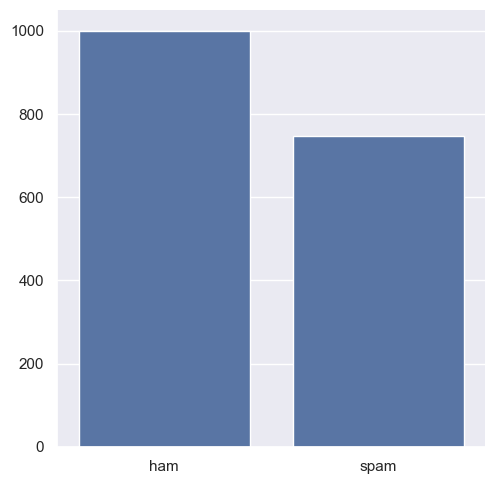

In [11]:
classs = list(balance_df["label"].value_counts().index)
valu = list(balance_df["label"].value_counts().values)
sns.set(rc={"figure.figsize":(20,10)})
sns.catplot(x=classs,y=valu,kind="bar")
plt.show()

In [13]:
##encoding 
balance_df["label"] = balance_df["label"].map({"ham":0,"spam":1})
balance_df.head()

,msg,label
2154,i dont have i shall buy one dear,0
1127,not tonight mate catching up on some sleep t...,0
3624,damn poor zac doesn t stand a chance,0
3469,yay finally lol i missed our cinema trip las...,0
5442,thank you do you generally date the brothas,0


In [14]:
##checking missing values 
balance_df.isnull().sum()

msg      0
label    0
dtype: int64

In [16]:
##checking duplicates 
balance_df.duplicated().sum()
#deleting duplicates 
balance_df.drop_duplicates(inplace=True)

In [18]:
##splitting the data
x = balance_df["msg"]
y = balance_df["label"]

In [19]:
#prepare single list of mails 
x = x.values
x

array(['i dont have i shall buy one dear',
       'not tonight mate  catching up on some sleep  this is my new number by the way  ',
       'damn  poor zac doesn t stand a chance', ...,
       'had your contract mobile    mnths  latest motorola  nokia etc  all free  double mins   text on orange tariffs  text yes for callback  no to remove from records ',
       'reminder from o   to get      pounds free call credit and details of great offers pls reply   this text with your valid name  house no and postcode',
       'this is the  nd time we have tried   contact u  u have won the       pound prize    claim is easy  call              now   only   p per minute  bt national rate '],
      dtype=object)

In [22]:
##initializing bow 
bow_obj = CountVectorizer(
    max_features=2000,
    stop_words="english"
)
x_transformed = bow_obj.fit_transform(x).toarray()

In [23]:
joblib.dump(bow_obj,"vectorizer.lb")

['vectorizer.lb']

In [24]:
##train test split 
x_train,x_test,y_train,y_test = train_test_split(x_transformed,
                                                 y,test_size=0.2)

In [25]:
##using multinomial naive bayes /// ypu can try with others too that are in the sklearn library 
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [26]:
model.score(x_test,y_test)

0.9411764705882353

In [27]:
model.score(x_train,y_train)

0.9821843532145623

In [29]:
pred = model.predict(x_test)
pred

array([0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [30]:
compare_dict = {"actual":y_test,"predicted":pred}
comparison = pd.DataFrame(compare_dict)
comparison.head()

,actual,predicted
767,0,0
4676,1,1
5159,0,1
1929,1,1
3422,1,1


In [31]:
joblib.dump(model,"spam_model.lb")

['spam_model.lb']

In [ ]:
##isska frontend banayenge kl using flask 